# 7 - Listas

Como parte da análise, faremos aqui duas listas, mostrando a evolução do atendimento e da demanda nas creches da cidade, por distrito.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dados_educ_pop = pd.read_csv('dados/dados_educ_pop.csv', sep = ',')

Vamos pegar apenas os dados que queremos comparar, que são o primeiro (junho de 2006) e o último (dezembro de 2006).

In [2]:
dados_2006 = dados_educ_pop[dados_educ_pop.MES_ANO_REF == 'jun-06']
dados_2017 = dados_educ_pop[dados_educ_pop.MES_ANO_REF == 'dez-17']

A primeira lista feita será a do atendimento.

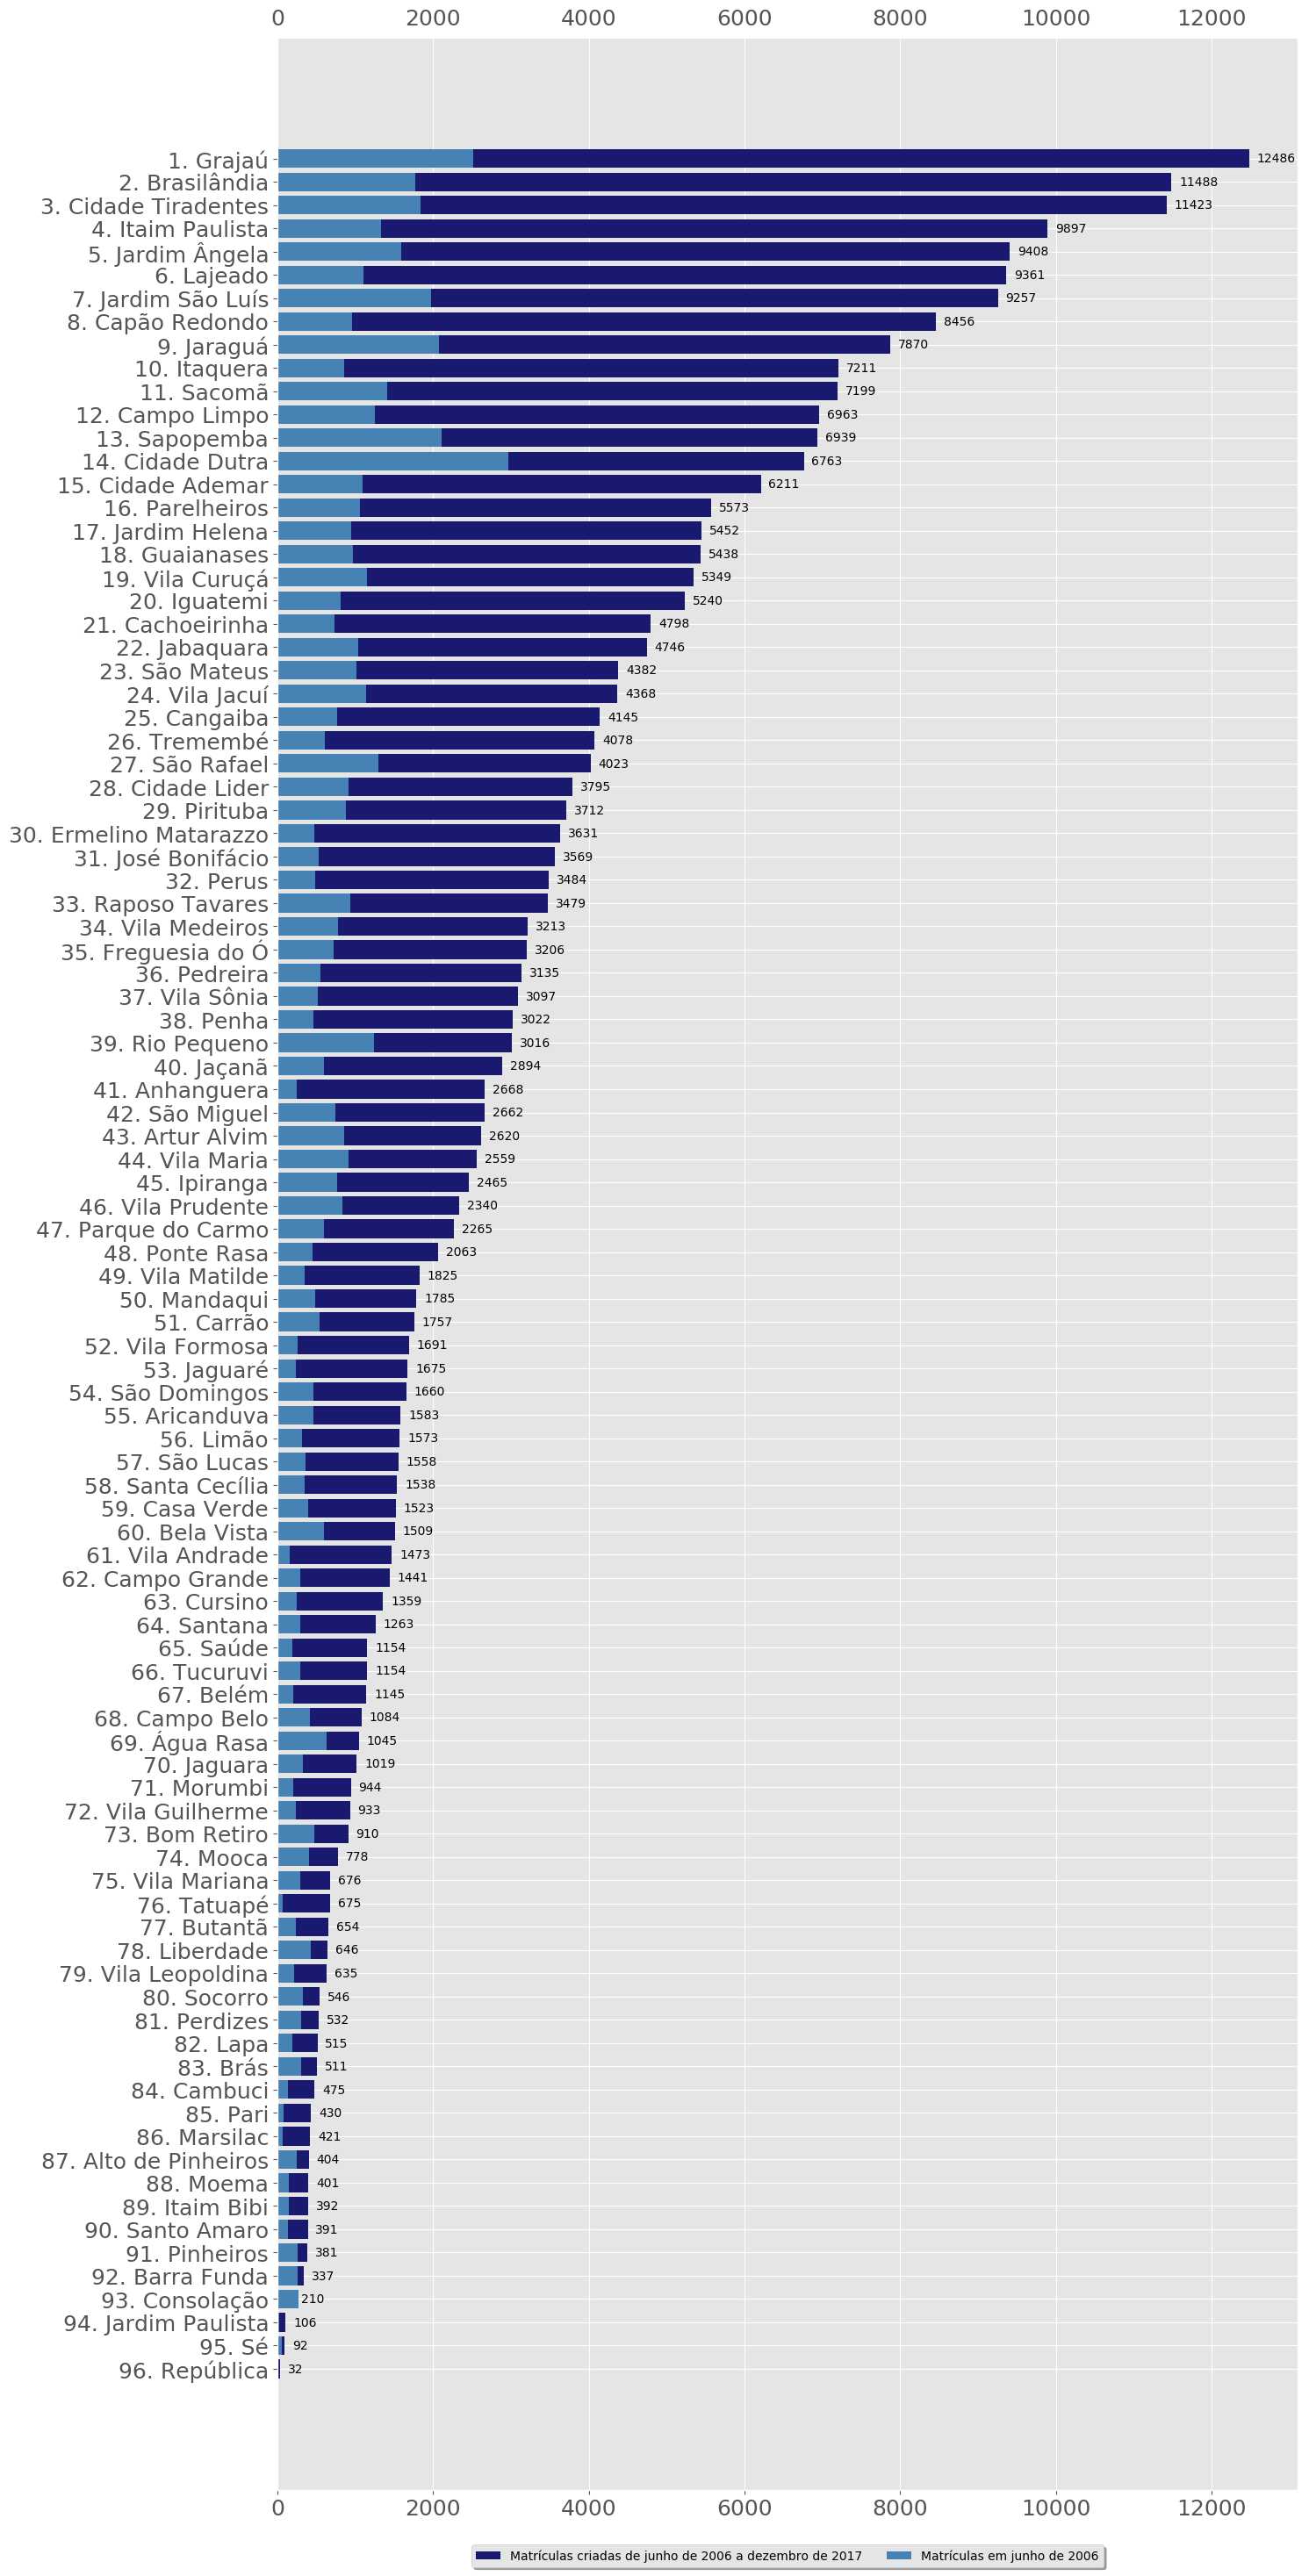

In [9]:
from matplotlib.pyplot import figure
plt.style.use('ggplot')
figure(num=None, figsize=(15, 37), dpi=100, facecolor='w', edgecolor='k')

dados_atendimento_2006 = dados_2006[['DISTRITO_F', 'MAT_CRECHE']]
dados_atendimento_2017 = dados_2017[['DISTRITO_F', 'MAT_CRECHE']]

dados_atendimento = dados_atendimento_2006.merge(dados_atendimento_2017, on = ['DISTRITO_F'])
dados_atendimento.columns = ['NOME', 'MAT_2006', 'MAT_2017']

dados_atendimento = dados_atendimento.sort_values(by='MAT_2017', ascending=True)
dados_atendimento = dados_atendimento.reset_index(drop=True)

for i in dados_atendimento.index:
    j = 96 - i
    dados_atendimento.at[i, 'NOME'] = str(j) + '. ' + dados_atendimento.at[i, 'NOME']

plt.barh(dados_atendimento['NOME'], dados_atendimento['MAT_2017'], label = 'Matrículas criadas de junho de 2006 a dezembro de 2017', color = 'midnightblue')
plt.barh(dados_atendimento['NOME'], dados_atendimento['MAT_2006'], label = 'Matrículas em junho de 2006', color = 'steelblue')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.02), shadow=True, ncol=2)
plt.tick_params(labeltop=True)
for y, x in enumerate(dados_atendimento['MAT_2017']):
    plt.annotate(int(x), xy=(x+100, y), va='center')
plt.show()

A segunda lista será a da demanda. Como a fila é sazonal, não é justo comparar meses diferentes. Por isso, os meses tratados são o mesmo.

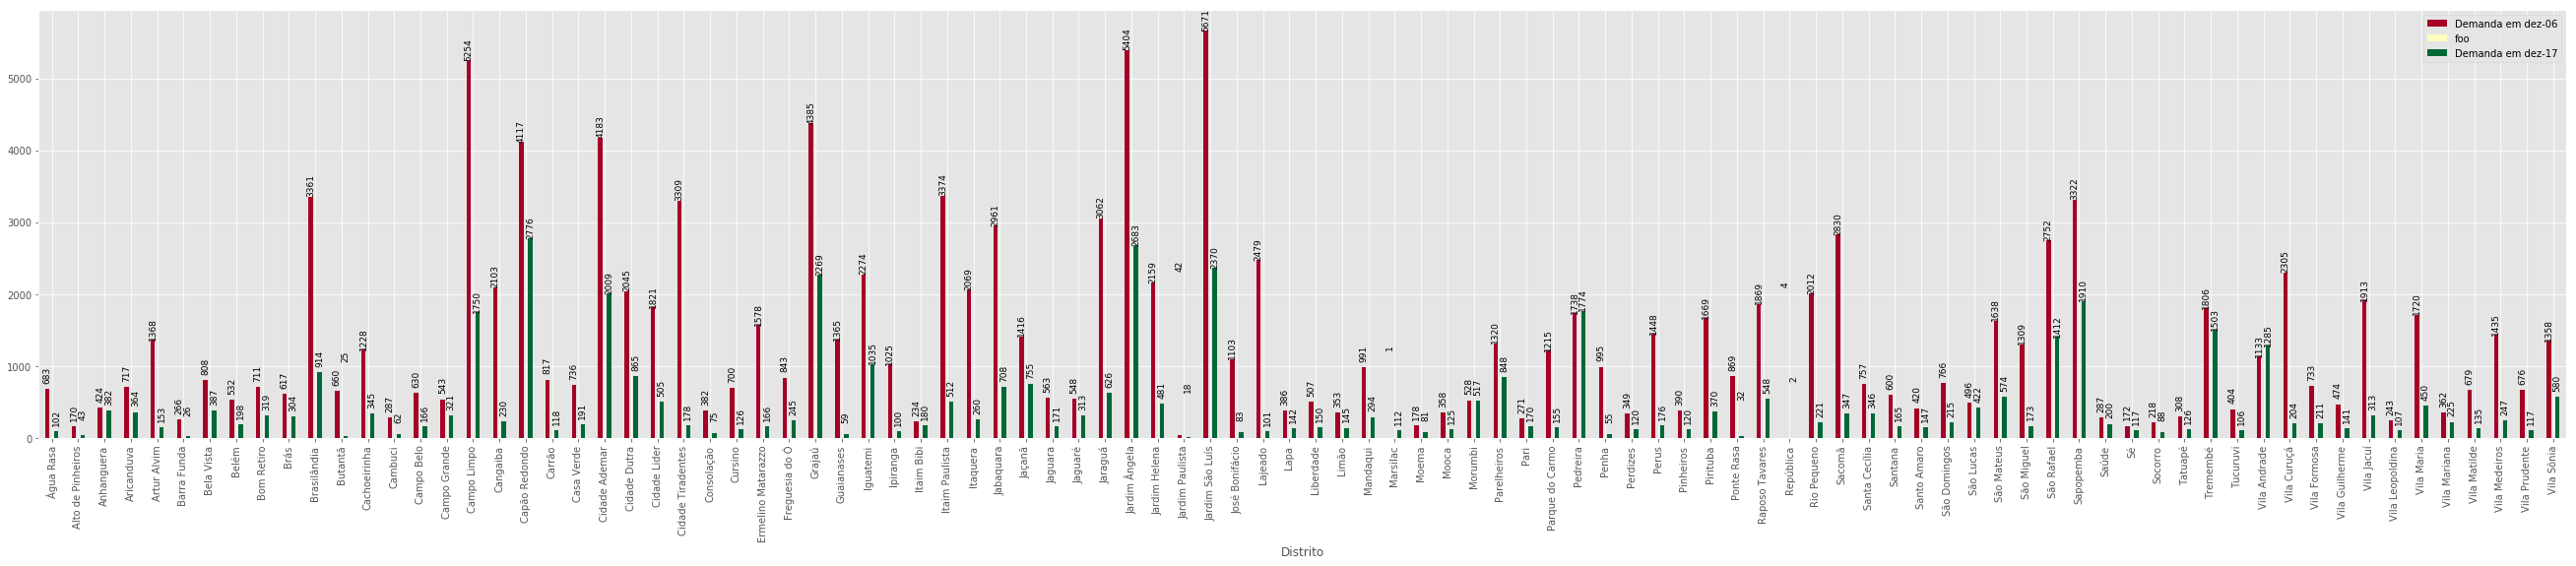

In [7]:
dados_2006 = dados_educ_pop[dados_educ_pop.MES_ANO_REF == 'dez-06']
dados_2017 = dados_educ_pop[dados_educ_pop.MES_ANO_REF == 'dez-17']

dados_demanda_2006 = dados_2006[['DISTRITO_F', 'DEM_CRECHE']]
dados_demanda_2017 = dados_2017[['DISTRITO_F', 'DEM_CRECHE']]

dados_demanda = dados_demanda_2006.merge(dados_demanda_2017, on = ['DISTRITO_F'])
dados_demanda.columns = ['Distrito', 'Demanda em dez-06', 'Demanda em dez-17']

for i in dados_demanda.index:
    dados_demanda['foo'] = 0
    
dados_demanda = dados_demanda[['Distrito', 'Demanda em dez-06', 'foo', 'Demanda em dez-17']]

ax = dados_demanda.set_index('Distrito', drop=True).plot(kind='bar', figsize=(46, 8), cmap='RdYlGn')
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    # change 0.92 to move the text up and down
    height = patch.get_height()
    if (height > 0):
        if (height > 50):
            y = height + 215
        ax.text(x,y,"%d" %(patch.get_height()), ha='center', rotation='vertical', fontsize=9)